# Requirements

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt

# Configuration

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [5]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [7]:
# Navigate to a web page.
#browser.get('https://www.apple.com/mk/')

In [8]:
# Print the page source code.
#print(browser.page_source)

In [9]:
# Select an element from the page.
#element = browser.find_element(By.CLASS_NAME, 'headline')

In [10]:
# Print the element's innner text.
#print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, your goal is to perform web scraping on the website https://sandbox.oxylabs.io/products. Collect information on each product, specifically: name, price, rating, and availability. Organize the extracted data into a data frame. Finally, create a histogram to visually represent the price distribution of the products.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [22]:
# Write your code here. Add as many code boxes as you need.
url = "https://sandbox.oxylabs.io/products"
browser.get(url)

names =[]
prices = []
ratings = []
availabilites = []

products = browser.find_elements(By.CLASS_NAME, 'product-card')
print(len(products))
for product in products:
    name_element = product.find_element(By.CLASS_NAME, 'title')
    names.append(name_element.text)

    
    price_element = product.find_element(By.CLASS_NAME, 'price-wrapper')
    price_text = price_element.text.replace('€', '').replace(',', '.').strip()
    prices.append(float(price_text))


    rating_element = product.find_elements(By.CLASS_NAME, 'css-1cftdwf')
    ratings.append(len(rating_element))

    if len(product.find_elements(By.CLASS_NAME, 'in-stock')) > 0:
        availabilites.append("In Stock")
    elif len(product.find_elements(By.CLASS_NAME, 'out-of-stock')) > 0:
        availabilites.append("Out of Stock")
    else:
        availabilites.append("Unknown")

browser.quit()

32


In [23]:
data = pd.DataFrame({
    'Name': names,
    'Price': prices,
    'Rating': ratings,
    'Availability': availabilites,
})

In [30]:
data.head(32)

,Name,Price,Rating,Availability
0,The Legend of Zelda: Ocarina of Time,91.99,5,Unknown
1,Super Mario Galaxy,91.99,5,Unknown
2,Super Mario Galaxy 2,91.99,5,Unknown
3,Metroid Prime,89.99,5,Unknown
4,Super Mario Odyssey,89.99,5,Unknown
5,Halo: Combat Evolved,87.99,5,Unknown
6,The House in Fata Morgana - Dreams of the Reve...,83.99,5,Unknown
7,NFL 2K1,62.99,5,Unknown
8,Uncharted 2: Among Thieves,88.99,5,Unknown
9,Tekken 3,91.99,5,Unknown


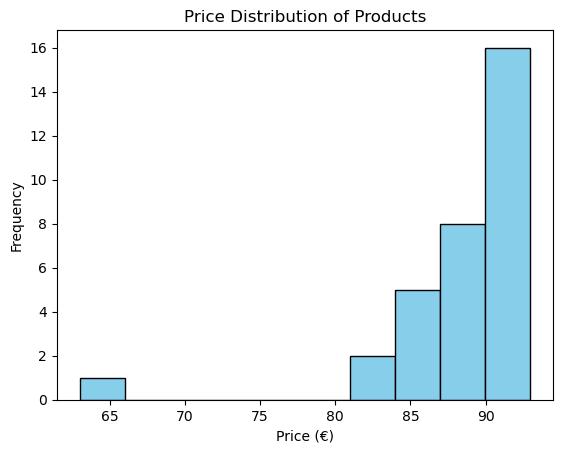

In [28]:
plt.hist(data['Price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.title('Price Distribution of Products')
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each product listed on the page, proceed to the individual page for each product, and extract the product description. Subsequently, you are required to compute both the mean and standard deviation of the number of characters of the product descriptions.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [7]:
# Write your code here. Add as many code boxes as you need.
import time
import numpy as np

In [19]:
url = "https://sandbox.oxylabs.io/products"
browser.get(url)
descriptions = []
for product_id in range(1,33):
    
    product_url = f"{url}/{product_id}"
    browser.get(product_url)
    

    time.sleep(1)


    try:
        description_element = browser.find_element(By.CLASS_NAME, 'description')
        description_text = description_element.text
        descriptions.append(description_text)
    except:
        descriptions.append("No description available")



browser.quit()

In [21]:
data = pd.DataFrame({
    'Description': descriptions
})

In [23]:
data.head(5)

,Description
0,"As a young boy, Link is tricked by Ganondorf, ..."
1,[Metacritic's 2007 Wii Game of the Year] The u...
2,"Super Mario Galaxy 2, the sequel to the galaxy..."
3,Samus returns in a new mission to unravel the ...
4,New Evolution of Mario Sandbox-Style Gameplay....


In [25]:
description_lengths = data['Description'].apply(len)
mean_length = description_lengths.mean()
std_dev_length = description_lengths.std()

In [27]:
print(mean_length)
print(std_dev_length)

574.34375
327.1822624515321
